In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import os

python_directory = os.path.abspath("")


# First submission runs (1 ABM run per infrastrcuture for appendix 2)
## Appendix 1 graph

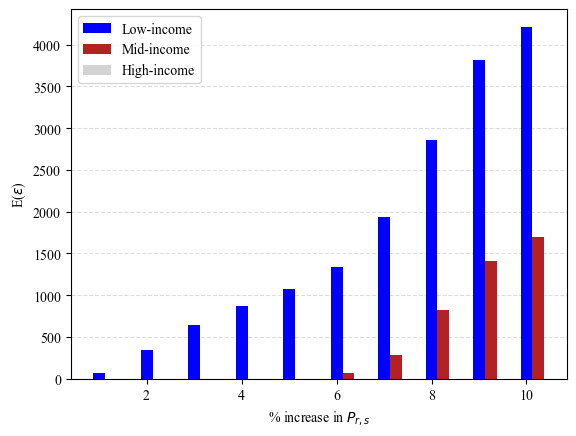

In [17]:
## Read sensitivity results
df = pd.read_pickle(rf"{python_directory}\Data\sensitivity_df.pkl")
df_oneSeed = df[df["run"] == 1]
## Separate between the different "modify_prices_percent" experiments
results_df_dict = {}
## remove next line to generate the graph for all the runs
df = df_oneSeed
for price in [1,2,3,4,5,6,7,8,9,10]:
    results_df_dict[price] = df[df["modify_prices_percent"] == price]

## Calculate the means and allocate them to a dictionary
means_dict = {
    "run": list(),
    "modify_prices_percent": list(),
    "low": list(),
    "mid": list(),
    "high": list(),
}
for price in results_df_dict:
    for parameter in means_dict:
        means_dict[parameter].append(np.mean(results_df_dict[price][parameter]))

## Generate a dataframe with the means of each experiment
means_df = pd.DataFrame(means_dict)

## Generate a box plot
x_axis = means_df["modify_prices_percent"]
width = 0.25
plt.figure()
plt.rcParams["font.family"] = "Times New Roman"
plt.xlabel(r"% increase in $P_{r,s}$")
plt.ylabel(r"E($\epsilon$)")
plt.grid(axis="y", which='major', color='#DDDDDD', linestyle="--", linewidth=0.8)
plt.bar(x_axis, means_df["low"], label="Low-income", color="blue", width=width, zorder=2)
plt.bar(x_axis + width, means_df["mid"], label="Mid-income", color="firebrick", width=width, zorder=2)
plt.bar(x_axis + width, means_df["high"], label="High-income", color="lightgrey", width=width, zorder=2)
plt.legend()
plt.savefig(rf"{python_directory}\Outcomes\sensitivity.png")
plt.show()
plt.close()

## Appendix 2 graph
### Number of road segments, cost and gentrification

4267
5352


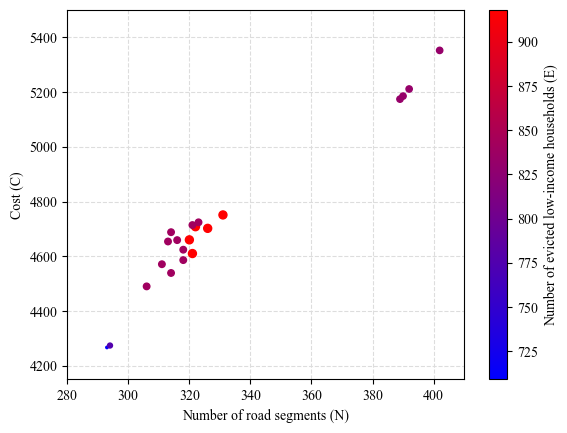

In [ ]:
# load file
df = pd.read_csv(rf"{python_directory}\Data\results_annealing_filtered_1to21.csv")

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","red"])
plt.figure()
plt.rcParams["font.family"] = "Times New Roman"
plt.grid(which='major', color='#DDDDDD', linestyle="--", linewidth=0.8)
plt.grid(which='minor', color='#DDDDDD', linestyle="--", linewidth=0.8)
sc = plt.scatter(
    df["Feature Count"], 
    df["Cost"], 
    s=[( (  (c - min(df["Gentrification"])) / (max(df["Gentrification"]) - min(df["Gentrification"]) ) ) + 0.1) * 30 for c in df["Gentrification"]], c=df["Gentrification"], 
    cmap=cmap,
    zorder=2
    )
cbar = plt.colorbar(sc)
cbar.set_label('Number of evicted low-income households (E)')
plt.xlim([280, 410])
plt.ylim([4150, 5500])
plt.xlabel("Number of road segments (N)")
plt.ylabel("Cost (C)")
plt.savefig(rf"{python_directory}\Outcomes\cost_features_evict.png")
plt.show()
plt.close()

# Second submission runs (100 ABM runs per infrastructure)
## Average per infrastructure alternative

Find the means and save the csv and pickle files.

In [87]:
# Read the results from the ABM and drop the unnamed indices
abm = pd.read_csv(rf"{python_directory}/Data/TN_Gentrification_Results_1to21.csv")
abm.drop(["Unnamed: 0", "seed"], axis="columns", inplace=True)
## Find the mean values of the network
abm_mean = abm.groupby("network").mean()
print(abm_mean)

# Read the results from the infrastructure abm
infra = pd.read_csv(rf"{python_directory}/Data/results_annealing_filtered_1to21.csv")
infra["Number"] = [i + 1 for i in infra.index]
# Join the infrastructure results to the abm results
infra_abm = infra.join(abm_mean, how="inner", on="Number")
infra_abm["Gentrification"] = [infra_abm.at[i, "low"] + infra_abm.at[i, "mid"] + infra_abm.at[i, "high"] for i in infra_abm.index]
display(infra_abm)
## save the file
infra_abm.to_csv(rf"{python_directory}/Data/annealing_gentrification.csv")
infra_abm.to_pickle(rf"{python_directory}/Data/annealing_gentrification.pkl")


                low       mid  high
network                            
1        919.180000  0.300000   0.0
2        919.180000  0.300000   0.0
3        919.365854  0.219512   0.0
4        919.180000  0.300000   0.0
5        919.180000  0.300000   0.0
6        840.430000  0.300000   0.0
7        840.430000  0.300000   0.0
8        840.430000  0.300000   0.0
9        840.430000  0.300000   0.0
10       840.430000  0.300000   0.0
11       840.430000  0.300000   0.0
12       696.000000  0.300000   0.0
13       777.840000  0.300000   0.0
14       840.160000  0.300000   0.0
15       840.160000  0.300000   0.0
16       840.160000  0.300000   0.0
17       840.160000  0.300000   0.0
18       831.010000  0.050000   0.0
19       831.010000  0.050000   0.0
20       831.010000  0.050000   0.0
21       831.010000  0.050000   0.0


,Iteration,Feature Count,Feature Set,Metric,Best Metric,Acceptance Probability,Random Number,Outcome,Feasible,Cost,Gentrification,Number,low,mid,high
0,68,331,"[0, 1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 16, 17, ...",0.288235,0.288235,-,-,Improved,Feasible,4751,919.480000,1,919.180000,0.300000,0.0
1,69,321,"[0, 1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 16, 17, ...",0.288235,0.288235,1,0.901233316,Accept,Feasible,4610,919.480000,2,919.180000,0.300000,0.0
2,70,326,"[0, 1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 16, 17, ...",0.288235,0.288235,1,0.972603301,Accept,Feasible,4702,919.585366,3,919.365854,0.219512,0.0
3,71,320,"[0, 1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 16, 17, ...",0.288235,0.288235,1,0.67575155,Accept,Feasible,4660,919.480000,4,919.180000,0.300000,0.0
4,72,322,"[0, 1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 16, 17, ...",0.288205,0.288235,0.999999835,0.5199771,Accept,Feasible,4708,919.480000,5,919.180000,0.300000,0.0
5,75,321,"[0, 1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 16, 17, ...",0.288205,0.288235,-,-,Improved,Feasible,4714,840.730000,6,840.430000,0.300000,0.0
6,74,323,"[0, 1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 16, 17, ...",0.288170,0.288235,1,0.143382203,Accept,Feasible,4724,840.730000,7,840.430000,0.300000,0.0
7,73,316,"[0, 1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 16, 17, ...",0.288170,0.288235,0.999999798,0.476109028,Accept,Feasible,4659,840.730000,8,840.430000,0.300000,0.0
8,77,313,"[0, 1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 16, 17, ...",0.277483,0.288235,-,-,Improved,Feasible,4654,840.730000,9,840.430000,0.300000,0.0
9,78,311,"[0, 1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 16, 17, ...",0.277482,0.288235,0.999999991,0.226601923,Accept,Feasible,4571,840.730000,10,840.430000,0.300000,0.0


Save the graphs

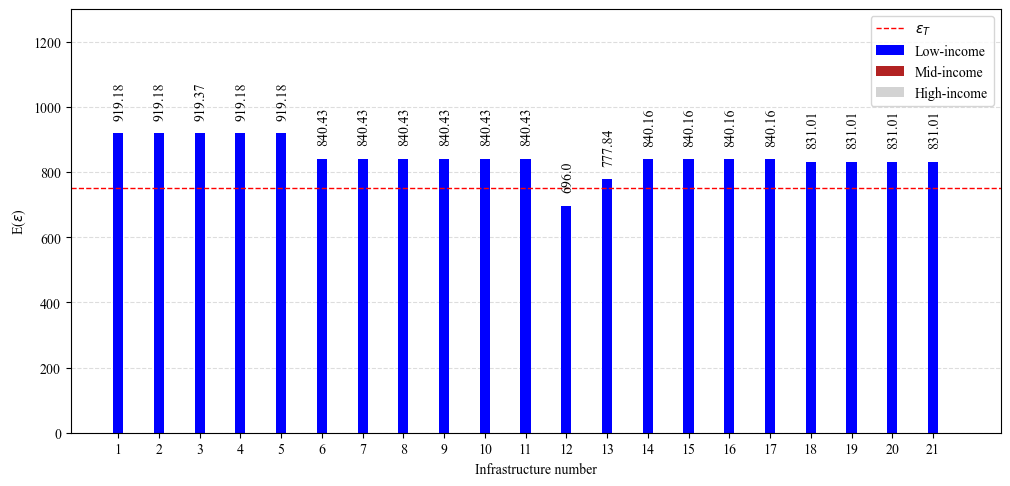

In [27]:
df = infra_abm
x_axis = df["Number"]
width = 0.25
plt.figure(figsize=(12,5.5))
plt.rcParams["font.family"] = "Times New Roman"
plt.xlabel(r"Infrastructure number")
plt.ylabel(r"E($\epsilon$)")
plt.grid(axis="y", which='major', color='#DDDDDD', linestyle="--", linewidth=0.8)
plt.bar(x_axis, df["low"], label="Low-income", color="blue", width=width, zorder=2)
plt.bar(x_axis + width, df["mid"], label="Mid-income", color="firebrick", width=width, zorder=2)
plt.bar(x_axis + width + width, df["high"], label="High-income", color="lightgrey", width=width, zorder=2)
plt.axhline(y = 750, color='red', linestyle='dashed', linewidth=1, label=r"$\epsilon_{T}$") 
plt.xticks(x_axis)
plt.ylim((0, 1300))
for i, v in enumerate(df["low"]):
    plt.text(x_axis[i] - 0.15, v + 50, str(round(v, 2)), rotation=90)
plt.legend()
plt.savefig(rf"{python_directory}\Outcomes\gentrification.png")
plt.show()
plt.close()



### Performance and gentrification (includes the 100 ABM runs infrastructure)

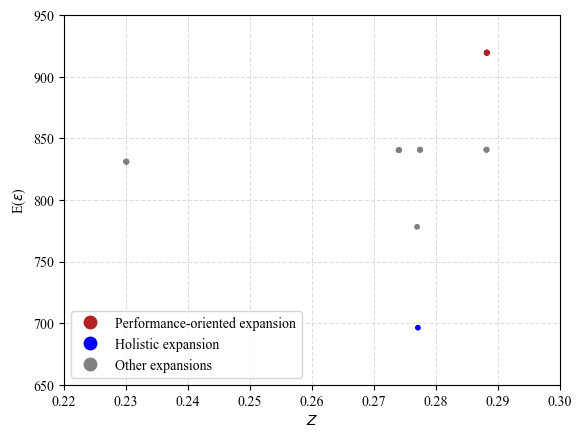

In [90]:
# load file
df = infra_abm
performance_colour = "firebrick"
holistic_colour = "blue"
others_colour = "grey"
## return the label and colour of the data point
def generate_name_color(gentrification, performance):
    if gentrification > 900 and performance > 0.26: return ("Performance-oriented expansions", performance_colour)
    elif gentrification < 750 and performance > 0.26: return ("Holistic expansions", holistic_colour)
    else: return ("Other expansions", others_colour)
df["Name"] = [generate_name_color(df.at[i, "Gentrification"], df.at[i, "Metric"])[0] for i in df.index]
df["Colour"] = [generate_name_color(df.at[i, "Gentrification"], df.at[i, "Metric"])[1] for i in df.index]

colours = {
    "Performance-oriented expansion": performance_colour,
    "Holistic expansion": holistic_colour,
    "Other expansions": others_colour
}
def create_custom_legend_handles(colours=colours):
    handles, labels = plt.gca().get_legend_handles_labels()
    extend_list = []
    for school_str in colours:
        point = Line2D([0], [0], label=school_str, marker='o', markersize=10, markeredgecolor="none", markerfacecolor=colours[school_str], linestyle="")
        extend_list.append(point)
    handles.extend(extend_list)
    return(handles)

plt.figure()
plt.rcParams["font.family"] = "Times New Roman"
plt.grid(which='major', color='#DDDDDD', linestyle="--", linewidth=0.8)
plt.grid(which='minor', color='#DDDDDD', linestyle="--", linewidth=0.8)
sc = plt.scatter(
    df["Metric"], 
    df["Gentrification"],
    c=list(df["Colour"]),
    s=10,
    zorder=2
    )
plt.xlim([0.22, 0.3])
plt.ylim([650, 950])
plt.xlabel(r"$Z$")
plt.ylabel(r"E($\epsilon$)")
plt.legend(handles=create_custom_legend_handles(colours), loc="lower left")
plt.savefig(rf"{python_directory}\Outcomes\performance_gentrification.png")
plt.show()
plt.close()

### Flood results

In [ ]:
## Read csv and generate the missing information from Fabrizio's graph
df_flood = pd.read_csv(rf"{python_directory}/Data/flood.csv")
display(df_flood)
df_flood["H_Hospital_L"] = [df_flood.at[0, "P_Hospital_L"] * (105.5 / 100)]
df_flood["H_School_L"]   = [df_flood.at[0, "P_School_L"]   * (106.7 / 100)]
df_flood["H_Work_L"]     = [df_flood.at[0, "P_Work_L"]     * (104.2 / 100)]
df_flood["H_Hospital_M"] = [df_flood.at[0, "P_Hospital_M"] * (100.0 / 100)]
df_flood["H_School_M"]   = [df_flood.at[0, "P_School_M"]   * (100.0 / 100)]
df_flood["H_Work_M"]     = [df_flood.at[0, "P_Work_M"]     * (114.5 / 100)]
df_flood["H_Hospital_H"] = [df_flood.at[0, "P_Hospital_H"] * (100.0 / 100)]
df_flood["H_School_H"]   = [df_flood.at[0, "P_School_H"]   * (100.0 / 100)]
df_flood["H_Work_H"]     = [df_flood.at[0, "P_Work_H"]     * (147.7 / 100)]

display(df_flood)

,P_Hospital_L,P_School_L,P_Work_L,P_Hospital_M,P_School_M,P_Work_M,P_Hospital_H,P_School_H,P_Work_H,B_Hospital_L,B_School_L,B_Work_L,B_Hospital_M,B_School_M,B_Work_M,B_Hospital_H,B_School_H,B_Work_H
0,1450,1200,2380,190,190,800,50,50,520,4200,1550,3100,1700,190,950,1900,50,1050


,P_Hospital_L,P_School_L,P_Work_L,P_Hospital_M,P_School_M,P_Work_M,P_Hospital_H,P_School_H,P_Work_H,B_Hospital_L,...,B_Work_H,H_Hospital_L,H_School_L,H_Work_L,H_Hospital_M,H_School_M,H_Work_M,H_Hospital_H,H_School_H,H_Work_H
0,1450,1200,2380,190,190,800,50,50,520,4200,...,1050,1529.75,1280.4,2479.96,190.0,190.0,916.0,50.0,50.0,768.04


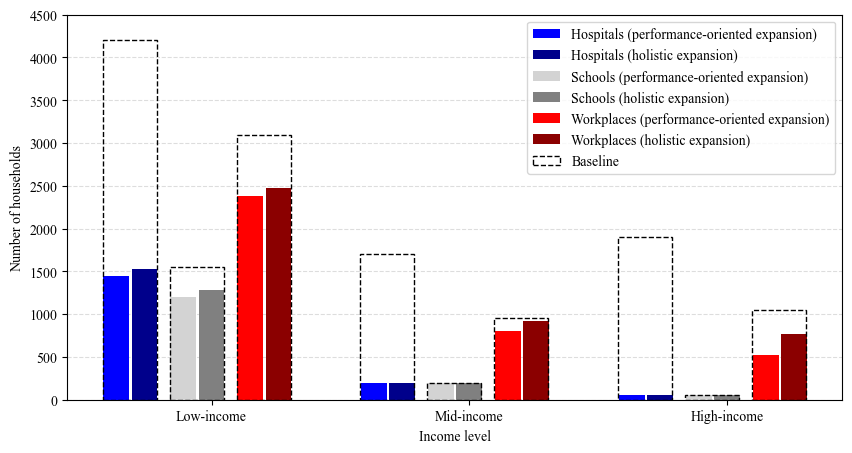

In [93]:
## Create the graph
df = df_flood
P_hospitals = [df.at[0, "P_Hospital_L"], df.at[0, "P_Hospital_M"], df.at[0, "P_Hospital_H"]]
P_schools = [df.at[0, "P_School_L"], df.at[0, "P_School_M"], df.at[0, "P_School_H"]]
P_work = df.at[0, "P_Work_L"], df.at[0, "P_Work_M"], df.at[0, "P_Work_H"]
H_hospitals = [df.at[0, "H_Hospital_L"], df.at[0, "H_Hospital_M"], df.at[0, "H_Hospital_H"]]
H_schools = [df.at[0, "H_School_L"], df.at[0, "H_School_M"], df.at[0, "H_School_H"]]
H_work = df.at[0, "H_Work_L"], df.at[0, "H_Work_M"], df.at[0, "H_Work_H"]
B_hospitals = [df.at[0, "B_Hospital_L"], df.at[0, "B_Hospital_M"], df.at[0, "B_Hospital_H"]]
B_schools = [df.at[0, "B_School_L"], df.at[0, "B_School_M"], df.at[0, "B_School_H"]]
B_work = df.at[0, "B_Work_L"], df.at[0, "B_Work_M"], df.at[0, "B_Work_H"]

x_axis = ["Low-income", "Mid-income", "High-income"]
bar_width = 0.1
margin_a = 0.01
margin_b = 0.05
x_1 = np.arange(len(x_axis))
x_2 = [x + bar_width + margin_a for x in x_1]
x_3 = [x + bar_width + margin_b for x in x_2]
x_4 = [x + bar_width + margin_a for x in x_3]
x_5 = [x + bar_width + margin_b for x in x_4]
x_6 = [x + bar_width + margin_a for x in x_5]
x_b1 = [x + (bar_width / 2) + 0.002 for x in x_1]
x_b2 = [x + (bar_width / 2) + 0.002 for x in x_3]
x_b3 = [x + (bar_width / 2) + 0.002 for x in x_5]
plt.figure(figsize=(10,5))
plt.grid(axis="y", which='major', color='#DDDDDD', linestyle="--", linewidth=0.8)
plt.bar(x_1, P_hospitals, width=bar_width, label="Hospitals (performance-oriented expansion)", color="blue", zorder=10)
plt.bar(x_2, H_hospitals, width=bar_width, label="Hospitals (holistic expansion)", color="darkblue", zorder=10)
plt.bar(x_3, P_schools, width=bar_width, label="Schools (performance-oriented expansion)", color="lightgray", zorder=10)
plt.bar(x_4, H_schools, width=bar_width, label="Schools (holistic expansion)", color="gray", zorder=10)
plt.bar(x_5, P_work, width=bar_width, label="Workplaces (performance-oriented expansion)", color="red", zorder=10)
plt.bar(x_6, H_work, width=bar_width, label="Workplaces (holistic expansion)", color="darkred", zorder=10)
plt.bar(x_b1, B_hospitals, width=(bar_width * 2) + margin_a, edgecolor="black", linestyle="--", color=(0,0,0,0), zorder=11, label="Baseline")
plt.bar(x_b2, B_schools, width=(bar_width * 2) + margin_a, edgecolor="black", linestyle="--", color=(0,0,0,0), zorder=11)
plt.bar(x_b3, B_work, width=(bar_width * 2) + margin_a, edgecolor="black", linestyle="--", color=(0,0,0,0), zorder=11)
plt.xticks(x_4, x_axis)
plt.xlabel("Income level")
plt.ylabel("Number of households")
plt.ylim((0, 4500))
plt.legend()
plt.savefig(rf"{python_directory}\Outcomes\flood.png")
plt.show()
plt.close()